In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from glob import glob
import os

In [4]:
def load_result(path):
    s = ['Box', 'Objectness', 'Classification', 'Precision', 'Recall',
         'val Box', 'val Objectness', 'val Classification', 'mAP@0.5', 'mAP@0.5:0.95']

    usecols=[2, 3, 4, 8, 9, 12, 13, 14, 10, 11]

    result = np.loadtxt(path, usecols = usecols, ndmin=2).T

    result_dict = {k:v for k,v in zip(s,result)}
    cols = [0,1,3,4,5,6,8,9]
    df = pd.DataFrame(result_dict).iloc[:,cols]

    min_col = [0,1,4,5]    
    max_col = [2,3,6,7]
    return df, (min_col, max_col)
    
def draw_plot(df, cols):   
    rows = 4
    cols = 2
    fig, axes = plt.subplots(rows, cols, figsize=(14,16))

    for i in range(rows * cols):
        length = df.shape[0]
        axes[i//cols][i%cols].plot(df.iloc[:,i], 
                                   marker='o', 
                                   markersize=4,
                                   color='dodgerblue')
        axes[i//cols][i%cols].fill_between(np.arange(length), 
                                           df.iloc[:,i], 
                                           color='dodgerblue', 
                                           alpha=0.1)
        axes[i//cols][i%cols].set_title(df.columns[i], 
                                        loc='left', 
                                        weight='bold', 
                                        size=14)
        axes[i//cols][i%cols].grid()
    plt.suptitle(f"YOLOv5 Training Result", weight='bold', size=20)
    plt.show();
    
def precision_recall(df):
    plt.figure(figsize=(14,5))
    plt.bar(np.arange(df.shape[0]), 
            df['Precision'], 
            alpha=0.3, 
            color='dodgerblue', 
            label='Precision')
    plt.bar(np.arange(df.shape[0]), 
            df['Recall'], 
            alpha=0.2,
            color='r', 
            label='Recall')
    plt.title(f"Precision & Recall", weight='bold', loc='left', size=16)
    plt.legend()
    plt.grid()
    plt.show();

def analysis(path):
    df, cols = load_result(path = path)
    draw_plot(df, cols)
    precision_recall(df)
    print(f"Best mAP : {df.iloc[:,6].max()}")
    return df


def show_max_mAP(df_lst):
    tmp = pd.DataFrame()
    for df in df_lst:
        tmp = pd.concat([tmp,df[df['mAP@0.5']==df['mAP@0.5'].max()]],0)
    tmp['Fold'] = [0,1,2,3,4]
    display(tmp)
    print(f"mAP@0.5 KFold mean :{tmp['mAP@0.5'].mean():.4f}")
    print(f"Best mAP Epoch : {list(tmp.index)}")
    #df[df['mAP@0.5:0.95']==df['mAP@0.5:0.95'].max()]

# Load All KFOLD model
def load_txt_files(folder_path):
    txt_files = []
    for dirname, _, filename in os.walk(folder_path):
        for file in filename:
            if file.split('.')[-1] == 'txt':
                txt_files.append(os.path.join(dirname, file))
    txt_files.sort()
    df_lst = []
    kfold_cols = []
    for text in txt_files:
        df, cols = load_result(text)
        df_lst.append(df)
        kfold_cols.append(cols)
    del txt_files
    
    rows = 4
    cols = 2
    fig, axes = plt.subplots(rows, cols, figsize=(14,16))

    for i in range(rows * cols):
        for j, df in enumerate(df_lst):
            axes[i//cols][i%cols].plot(df.iloc[:,i], 
                                       marker='o', 
                                       markersize=2, 
                                       alpha=0.2, 
                                       label=f"FOLD {j}")
        axes[i//cols][i%cols].legend()
        axes[i//cols][i%cols].set_title(df.columns[i], loc='left', weight='bold', size=14)
        axes[i//cols][i%cols].grid()

    plt.suptitle(f"YOLOv5 KFOLD Training Result", weight='bold', size=20)
    plt.show();
    
    plt.figure(figsize=(14,5))
    plt.axhline(y=0, color='black', linestyle='--')
    for i, df in enumerate(df_lst):
        plt.bar(np.arange(df.shape[0])+i/5, 
                df['Precision']-df['Recall'], 
                alpha=0.3, 
                label=f"FOLD {i}", 
                width=0.15)
        plt.xticks(np.arange(df.shape[0]), np.arange(df.shape[0]))
    plt.title(f"Precision - Recall", weight='bold', loc='left', size=16)
    plt.legend()
    plt.grid()
    plt.show();
    
    show_max_mAP(df_lst)

# Sampling

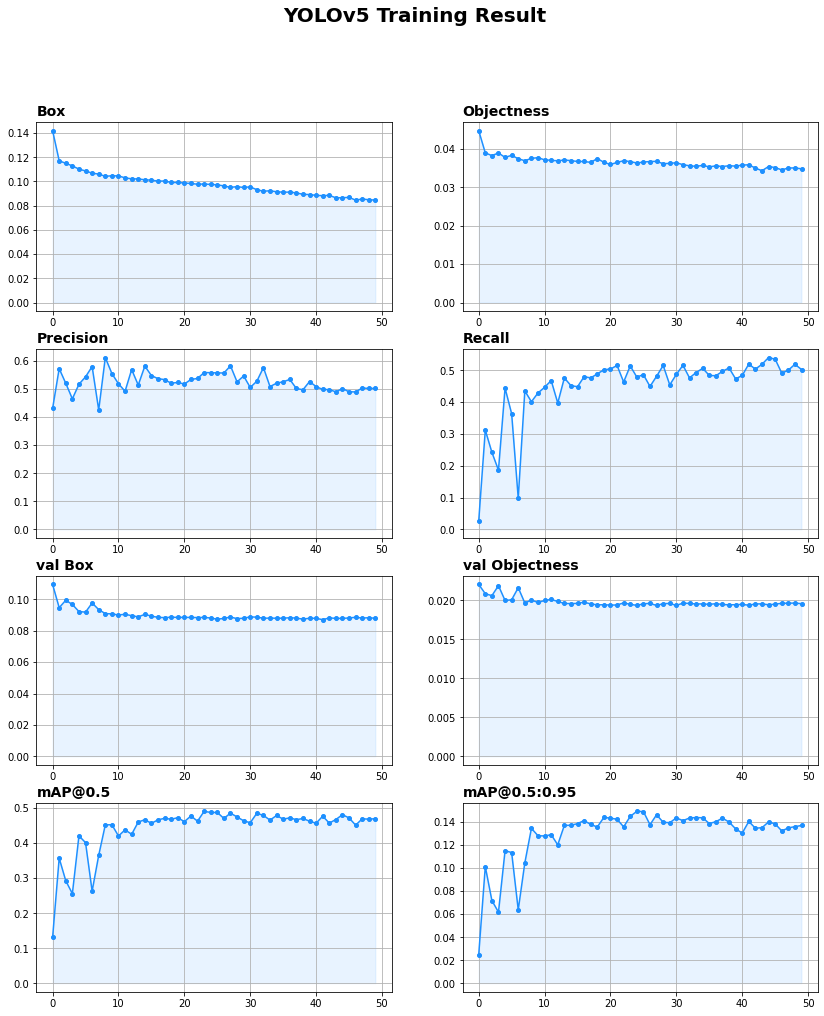

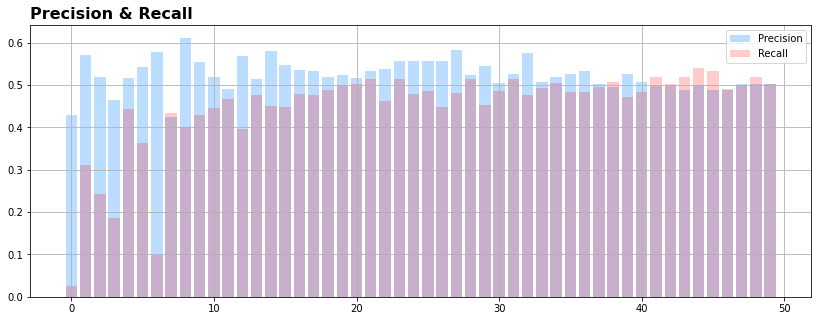

Best mAP : 0.4907


In [5]:
yolo50 = analysis('./results_50.txt')

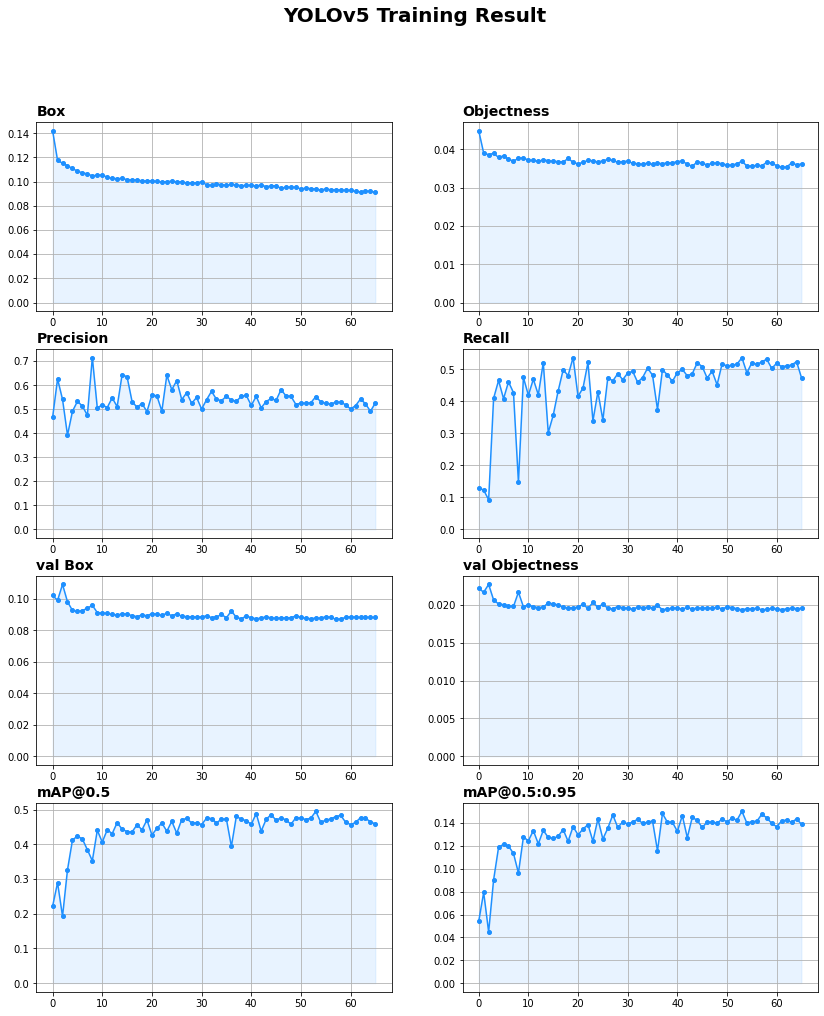

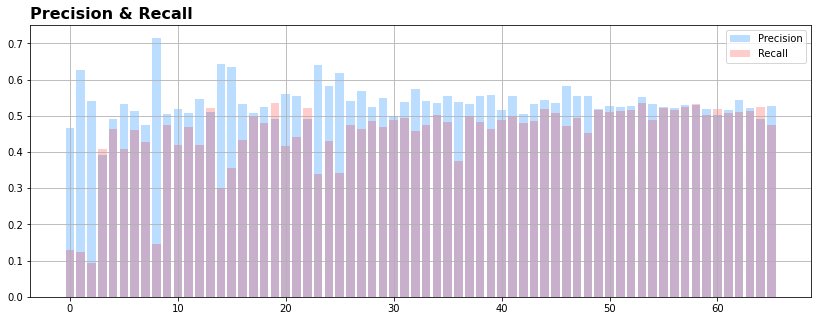

Best mAP : 0.4952


In [6]:
yolo65 = analysis('./results_65.txt')

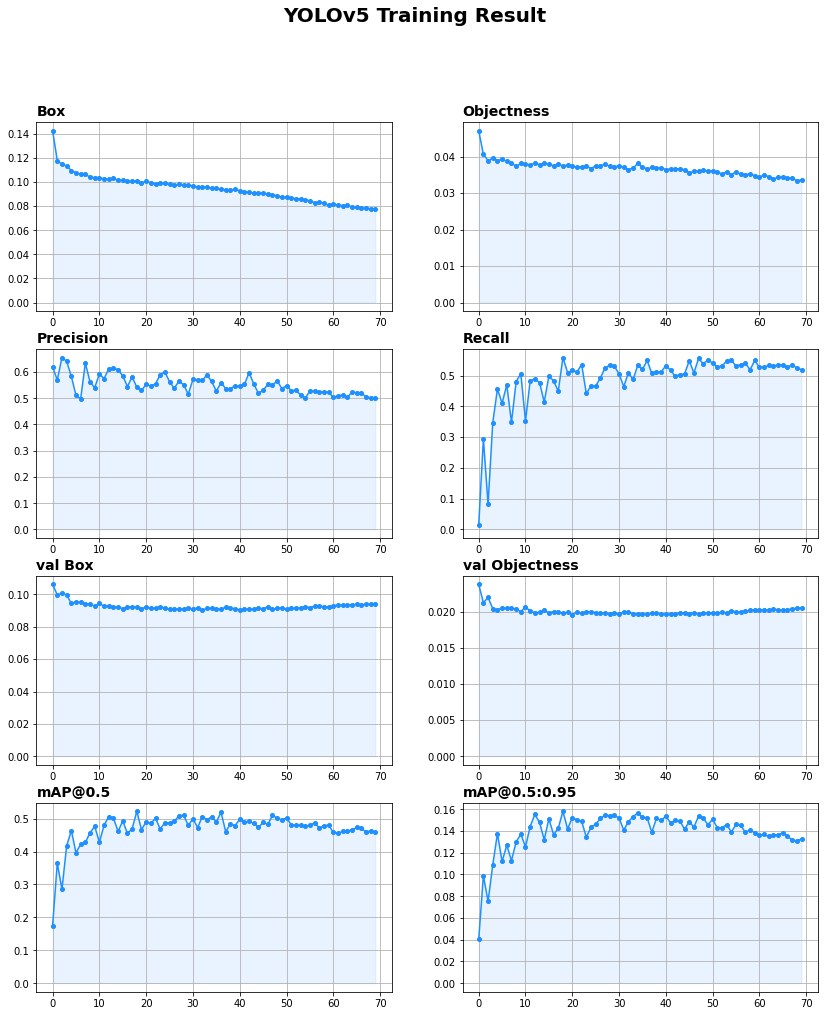

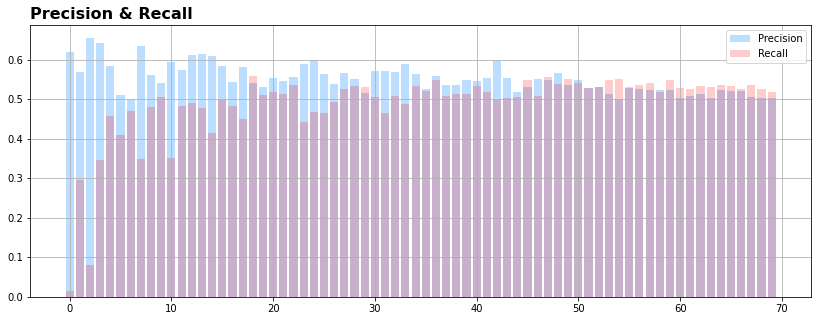

Best mAP : 0.5223


In [7]:
new_yolov5x70_fold0 = analysis('./new_yolov5_fold0.txt')

In [15]:
# training 시 보여주는 지표
# epoch, gpu_memory, box, obj, cls, total, targets, img_size
# 필요 지표 : box_loss, obj_loss, total(mAP?)

(0.4907, 0.1493)

In [9]:
show_max_mAP(yolo50)

Box  Objectness  Precision  Recall  val Box  val Objectness  mAP@0.5  \
23  0.09791     0.03669     0.5579  0.5132  0.08851         0.01951   0.4907   

    mAP@0.5:0.95  
23        0.1449

Box  Objectness  Precision  Recall  val Box  val Objectness  mAP@0.5  \
24  0.09757     0.03631     0.5574  0.4783  0.08811         0.01937   0.4875   

    mAP@0.5:0.95  
24        0.1493

In [10]:
show_max_mAP(yolo65)

Box  Objectness  Precision  Recall  val Box  val Objectness  mAP@0.5  \
53  0.0939     0.03694     0.5521  0.5358  0.08788         0.01936   0.4952   

    mAP@0.5:0.95  
53        0.1502

Box  Objectness  Precision  Recall  val Box  val Objectness  mAP@0.5  \
53  0.0939     0.03694     0.5521  0.5358  0.08788         0.01936   0.4952   

    mAP@0.5:0.95  
53        0.1502

In [12]:
show_max_mAP(new_yolov5x70_fold0)

Box  Objectness  Precision  Recall  val Box  val Objectness  mAP@0.5  \
18  0.1009     0.03745     0.5416  0.5586  0.09207         0.01975   0.5223   

    mAP@0.5:0.95  
18        0.1581

Box  Objectness  Precision  Recall  val Box  val Objectness  mAP@0.5  \
18  0.1009     0.03745     0.5416  0.5586  0.09207         0.01975   0.5223   

    mAP@0.5:0.95  
18        0.1581

# | Model All KFOLD |

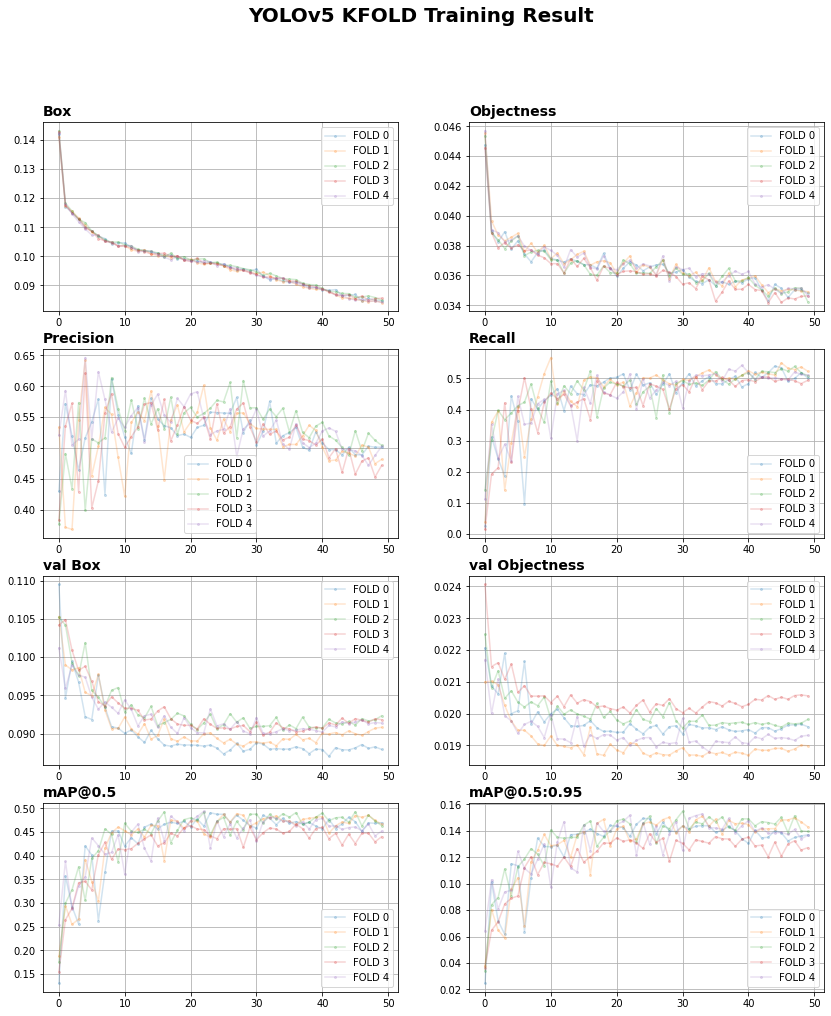

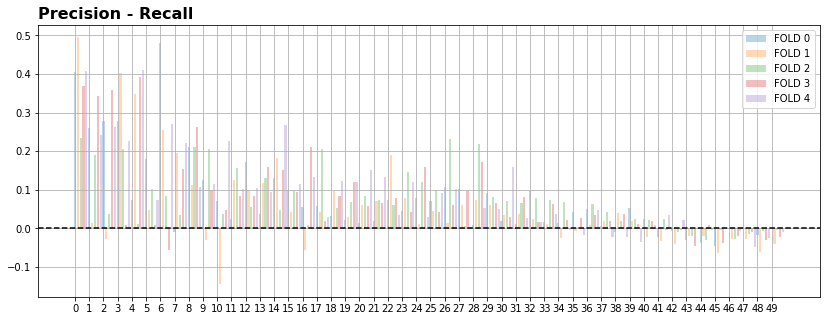

Box  Objectness  Precision  Recall  val Box  val Objectness  mAP@0.5  \
23  0.09791     0.03669     0.5579  0.5132  0.08851         0.01951   0.4907   
27  0.09481     0.03706     0.5564  0.4948  0.08864         0.01871   0.4889   
45  0.08598     0.03478     0.5282  0.5315  0.09112         0.01958   0.4929   
36  0.09138     0.03488     0.5377  0.5031  0.09023         0.02024   0.4665   
22  0.09842     0.03701     0.5484  0.5146  0.09010         0.01900   0.4937   

    mAP@0.5:0.95  Fold  
23        0.1449     0  
27        0.1485     1  
45        0.1502     2  
36        0.1339     3  
22        0.1517     4

mAP@0.5 KFold mean :0.4865
Best mAP Epoch : [23, 27, 45, 36, 22]


In [121]:
load_txt_files('./fold/yolov5x/')

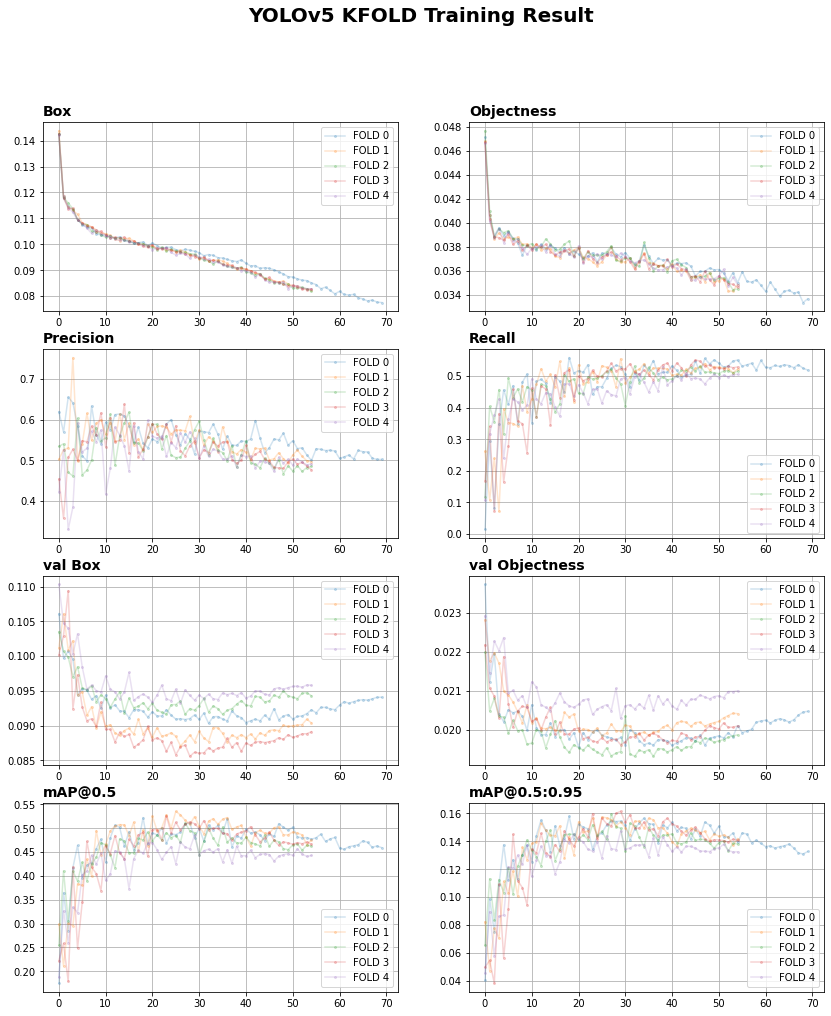

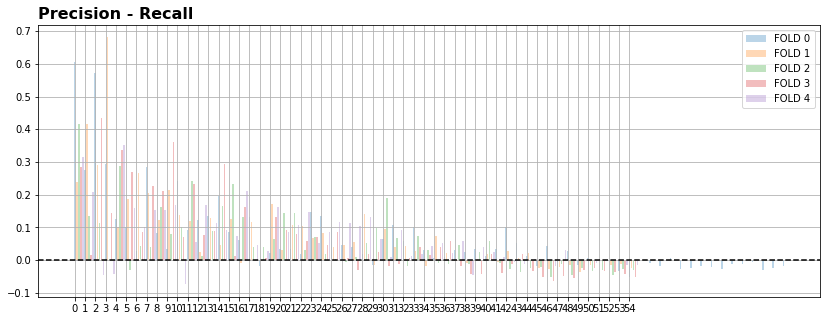

Box  Objectness  Precision  Recall  val Box  val Objectness  mAP@0.5  \
18  0.10090     0.03745     0.5416  0.5586  0.09207         0.01975   0.5223   
25  0.09720     0.03678     0.5742  0.5327  0.08844         0.01984   0.5354   
27  0.09686     0.03809     0.5291  0.5210  0.09162         0.01932   0.5109   
23  0.09860     0.03703     0.5892  0.5185  0.08629         0.01970   0.5258   
29  0.09601     0.03748     0.5534  0.4903  0.09365         0.02029   0.4848   

    mAP@0.5:0.95  Fold  
18        0.1581     0  
25        0.1574     1  
27        0.1595     2  
23        0.1598     3  
29        0.1474     4

mAP@0.5 KFold mean :0.5158
Best mAP Epoch : [18, 25, 27, 23, 29]


In [120]:
# 데이터 셋 구성을 바꾼 후 테스트
load_txt_files('./fold/new_yolov5x/')

In [115]:
list(a.index)

[18, 25, 27, 23, 29]